In [1]:
import numpy.random as rm
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

1. Create function for generating a population distribution given N population and p allele frequency

In [2]:
def WF_sim(pop_size,p): #define function for WF with input population size and allele freq
    AF_list = [] #create empty list for AFs
    n = pop_size * 2 #n = population size * 2; 2N?
    while (p > 0) and (p < 1): #while AF is not fixed:
        i = rm.binomial(n,p)
        p = i/n #frequency
        AF_list.append(p) #add random frequency to AF_list?
    return AF_list

print(WF_sim(100,0.9))

[0.9, 0.88, 0.85, 0.885, 0.88, 0.89, 0.9, 0.9, 0.89, 0.88, 0.875, 0.86, 0.845, 0.83, 0.8, 0.81, 0.795, 0.815, 0.8, 0.805, 0.805, 0.8, 0.84, 0.84, 0.85, 0.845, 0.805, 0.795, 0.77, 0.77, 0.76, 0.755, 0.8, 0.825, 0.825, 0.82, 0.77, 0.825, 0.84, 0.85, 0.865, 0.915, 0.95, 0.93, 0.92, 0.94, 0.955, 0.975, 0.98, 0.965, 0.965, 0.965, 0.975, 0.965, 0.975, 0.97, 0.975, 0.98, 0.995, 0.995, 0.995, 0.99, 0.995, 0.99, 0.995, 0.995, 0.995, 0.99, 0.99, 0.98, 0.96, 0.91, 0.9, 0.855, 0.84, 0.845, 0.85, 0.865, 0.885, 0.9, 0.91, 0.94, 0.94, 0.945, 0.93, 0.94, 0.955, 0.96, 0.97, 0.995, 0.995, 1.0]


Write a function that plots the allele frequency vs. generation for the entirety of your simulation.
Make plot for one of the simulations

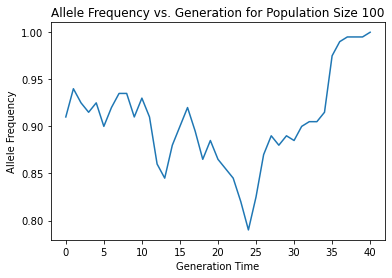

In [3]:
AF = WF_sim(100,0.9)
gen = range(0,len(AF))
plt.plot(gen,AF)
plt.title('Allele Frequency vs. Generation for Population Size 100')
plt.xlabel('Generation Time')
plt.ylabel('Allele Frequency')
plt.show()


Starting AF = 0.5
population size = 100
make histogram w/ density showing time to fixation over at least 1000 trials

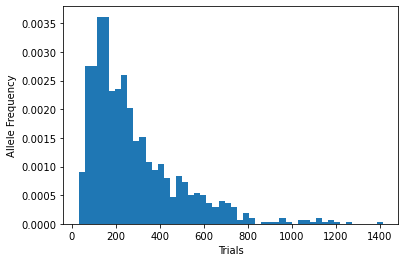

In [4]:
total_trials = []

trials = range(0,1000)
for trial in trials: 
    total_trials.append(len(WF_sim(100,0.5)))

x = total_trials
plt.hist(x, density=True, bins=50)
plt.xlabel('Trials')
plt.ylabel('Allele Frequency') #check this
plt.show()

For a starting allele frequency of 0.5, vary the population size and produce a plot that shows fixation time vs (N). A reasonable range of population sizes might be 100 to 10 million.

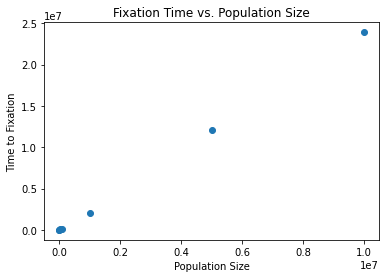

In [5]:
fix_rate = []

pop_size2 = 100, 1000, 10000, 100000, 1000000, 5000000, 10000000
for pop in pop_size2:
    fix_rate.append(len(WF_sim(pop,0.5)))
    
plt.scatter(pop_size2,fix_rate)
plt.title('Fixation Time vs. Population Size')
plt.xlabel('Population Size')
plt.ylabel('Time to Fixation')
plt.show()

Simulate the time to fixation under a range of different starting allele frequencies. Produce a plot showing starting allele frequency vs. number of generations to fix. Do (at least) 100 simulations for each and include the variability in your plot.

[196.3085214655747, 225.05484309385565, 152.83565160001118, 212.88292063949143, 191.54853666890804, 225.35009629463218, 176.81441655023494, 183.36115619181726, 134.21754728797572]


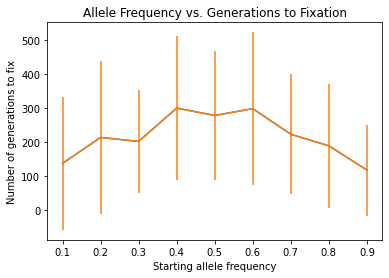

In [6]:
mean_fix = []
std_fix = []

AF_list = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
for AF in AF_list:
    trials = range(0,100)
    fix_rate2 = []
    for trial in trials: 
        fix_rate2.append(len(WF_sim(100,AF)))
    std_fix.append(np.std(fix_rate2))
    mean_fix.append(np.mean(fix_rate2))

print(std_fix)

plt.plot(AF_list,mean_fix)
plt.errorbar(AF_list, mean_fix, yerr=std_fix)
plt.title('Allele Frequency vs. Generations to Fixation')
plt.xlabel('Starting allele frequency')
plt.ylabel('Number of generations to fix')
plt.show()

Introduce selection to your function from Part 1 (as an additional parameter that can be specified) and plot the allele frequency trajectory for some chosen parameters. On your plot, make sure you note what your selection coefficient for the simulation was. Additionally, plot selection coefficient vs time to fixation for a fixed population size of your choice. On your plot, make sure you note what your population size was.

In [7]:
def sel_freq(size,freq,sel):
    freq_list = []
    n = 2 * size
    p = ((freq * (1+sel)) / (n - freq + (freq * (1 + sel))))
    while (p > 0) and (p < 1):
        freq_list.append(rm.binomial(n,p,size=None))
        p = ((freq_list[-1] * (1+sel)) / (n - freq_list[-1] + (freq_list[-1] * (1 + sel))))
    return freq_list

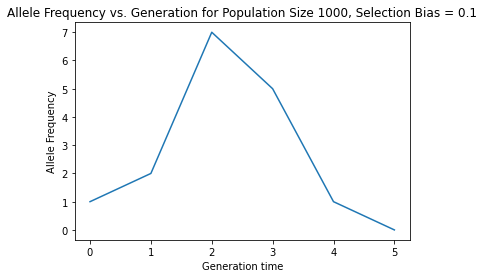

In [8]:
AF_p_sel = sel_freq(1000,0.9,0.1)

gen = range(0,len(AF_p_sel))
plt.plot(gen,AF_p_sel)
plt.title('Allele Frequency vs. Generation for Population Size 1000, Selection Bias = 0.1')
plt.xlabel('Generation time')
plt.ylabel('Allele Frequency')
plt.show()

Additionally, plot selection coefficient vs time to fixation for a fixed population size of your choice. On your plot, make sure you note what your population size was

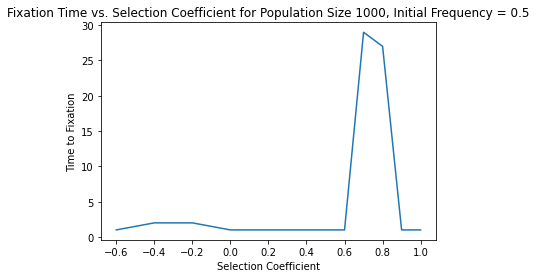

In [9]:
fix_rate = []

sel_coeff = -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0
for coeff in sel_coeff:
    fix_rate.append(len(sel_freq(1000,0.5,coeff)))
    
plt.plot(sel_coeff,fix_rate)
plt.title('Fixation Time vs. Selection Coefficient for Population Size 1000, Initial Frequency = 0.5')
plt.xlabel('Selection Coefficient')
plt.ylabel('Time to Fixation')
plt.show()